# Predicting Chronic Heart Faliure
### Task Category: Binary Classification 
### Approach: Naive Bayes
### Dataset: Myocardial infarction complications - [(Link to Dataset)](https://archive.ics.uci.edu/dataset/579/myocardial+infarction+complications)

In [340]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import classification_report 
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

## Data Loading and Processing

### Load the dataset into pandas dataframe
1. We extract the names of the columns from the dataset description as the imported dataset just contains column names as numbers from 0 to 123
2. We then remove few columns from the dataset
   - The ID column is just there for reference hence can be removed
   - The other columns removed are: 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'REC_IM', 'P_IM_STEN', 'LET_IS'
   - These columns ar actually the other target variables. Their column numbers are 0, 113, 114, 115, 116, 117, 118, 119, 121, 122, 123 (Note column 120 is the ZSN column which is our desired target variable)

In [341]:
column_names = [
    "ID", "AGE", "SEX", "INF_ANAM", "STENOK_AN", "FK_STENOK", "IBS_POST", "IBS_NASL", "GB", "SIM_GIPERT",
    "DLIT_AG", "ZSN_A", "nr11", "nr01", "nr02", "nr03", "nr04", "nr07", "nr08", "np01", "np04", "np05", "np07",
    "np08", "np09", "np10", "endocr_01", "endocr_02", "endocr_03", "zab_leg_01", "zab_leg_02", "zab_leg_03",
    "zab_leg_04", "zab_leg_06", "S_AD_KBRIG", "D_AD_KBRIG", "S_AD_ORIT", "D_AD_ORIT", "O_L_POST", "K_SH_POST",
    "MP_TP_POST", "SVT_POST", "GT_POST", "FIB_G_POST", "ant_im", "lat_im", "inf_im", "post_im", "IM_PG_P",
    "ritm_ecg_p_01", "ritm_ecg_p_02", "ritm_ecg_p_04", "ritm_ecg_p_06", "ritm_ecg_p_07", "ritm_ecg_p_08",
    "n_r_ecg_p_01", "n_r_ecg_p_02", "n_r_ecg_p_03", "n_r_ecg_p_04", "n_r_ecg_p_05", "n_r_ecg_p_06", "n_r_ecg_p_08",
    "n_r_ecg_p_09", "n_r_ecg_p_10", "n_p_ecg_p_01", "n_p_ecg_p_03", "n_p_ecg_p_04", "n_p_ecg_p_05", "n_p_ecg_p_06",
    "n_p_ecg_p_07", "n_p_ecg_p_08", "n_p_ecg_p_09", "n_p_ecg_p_10", "n_p_ecg_p_11", "n_p_ecg_p_12", "fibr_ter_01",
    "fibr_ter_02", "fibr_ter_03", "fibr_ter_05", "fibr_ter_06", "fibr_ter_07", "fibr_ter_08", "GIPO_K", "K_BLOOD",
    "GIPER_Na", "Na_BLOOD", "ALT_BLOOD", "AST_BLOOD", "KFK_BLOOD", "billions per liter", "ROE", "TIME_B_S",
    "R_AB_1_n", "R_AB_2_n", "R_AB_3_n", "NA_KB", "NOT_NA_KB", "LID_KB", "NITR_S", "NA_R_1_n", "NA_R_2_n", "NA_R_3_n",
    "NOT_NA_1_n", "NOT_NA_2_n", "NOT_NA_3_n", "LID_S_n", "B_BLOK_S_n", "ANT_CA_S_n", "GEPAR_S_n", "ASP_S_n", "TIKL_S_n",
    "TRENT_S_n", "FIBR_PREDS", "PREDS_TAH", "JELUD_TAH", "FIBR_JELUD", "A_V_BLOK", "OTEK_LANC", "RAZRIV", "DRESSLER",
    "ZSN", "REC_IM", "P_IM_STEN", "LET_IS"
]

mi = pd.read_csv('MI.data', names = column_names, header=None)


drop_columns = ['ID', 'FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'REC_IM', 'P_IM_STEN', 'LET_IS']


mi.drop(columns=drop_columns, inplace=True)

In [342]:
mi

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
0,77,1,2,1,1,2,?,3,0,7,...,0,0,1,0,0,1,1,0,0,0
1,55,1,1,0,0,0,0,0,0,0,...,0,0,1,0,1,1,1,0,1,0
2,52,1,0,0,0,2,?,2,0,2,...,2,2,1,1,0,1,1,0,0,0
3,68,0,0,0,0,2,?,2,0,3,...,0,0,0,0,1,1,1,0,0,1
4,60,1,0,0,0,2,?,3,0,7,...,0,0,0,0,1,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77,0,0,4,2,1,?,2,0,7,...,?,?,0,0,0,0,0,0,0,0
1696,70,0,0,6,2,1,?,2,0,7,...,?,?,1,0,0,0,0,0,0,0
1697,55,1,3,6,2,2,?,0,0,0,...,0,0,0,1,0,1,1,0,0,0
1698,79,0,2,2,2,1,?,2,0,7,...,?,?,1,0,1,1,1,0,0,0


### Cleaning the Dataset
1. The dataset contains missing values denoted by '?'.
   - We use the regex r'[^0-9.-]+' to replace any non numeric value with NA.
   - Then for further processing we convert the all columns into numeric.

In [343]:
# removing any non numeric values from the dataset
mi.replace(to_replace=r'[^0-9.-]+', value=pd.NA, regex=True, inplace=True)

# Convert all columns to numeric
mi = mi.apply(pd.to_numeric)

# Checking the missing values in the data set
missing_values = mi.isna().sum()
print(missing_values[missing_values > 0])

AGE             8
INF_ANAM        4
STENOK_AN     106
FK_STENOK      73
IBS_POST       51
             ... 
ANT_CA_S_n     13
GEPAR_S_n      17
ASP_S_n        17
TIKL_S_n       16
TRENT_S_n      16
Length: 110, dtype: int64


2. Since some of our columns represent categorical features(includes binary) and some represent continuous features. Hence, the missing values have to be handled differently.
   * Missing value in continuous feature columns can be replaced with mean or median.
   * Missing values in cateogrical and binary columns can be imputed with most frequent value or mode
   

In [344]:
continuous_columns = ['AGE', 'S_AD_KBRIG', 'D_AD_KBRIG', 'S_AD_ORIT', 'D_AD_ORIT', 'K_BLOOD', 'Na_BLOOD', 'ALT_BLOOD', 'AST_BLOOD', 'KFK_BLOOD', 'billions per liter', 'ROE', 'NA_R_1_n', 'NA_R_2_n', 'NA_R_3_n', 'NOT_NA_2_n', 'NOT_NA_3_n']


for col in mi.columns:
    # Impute missing values of continuous columns with median
    if col in continuous_columns:
        mi[col] = mi[col].fillna(mi[col].median())
        # mi[col].fillna(mi[col].median(), inplace=True)

    # Impute missing values of remaining columns with mode
    if col not in continuous_columns:
        mi[col] = mi[col].fillna(mi[col].mode()[0])
        # mi[col].fillna(mi[col].mode()[0], inplace=True)

print(mi.info())
mi

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1700 entries, 0 to 1699
Columns: 112 entries, AGE to ZSN
dtypes: float64(110), int64(2)
memory usage: 1.5 MB
None


,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
0,77.0,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,55.0,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,52.0,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,...,2.0,2.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,68.0,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,...,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,60.0,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,77.0,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1696,70.0,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1697,55.0,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
1698,79.0,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0


### Normalizing the dataset
Using the MinMaxScaler from sklearn we normalize only those columns which represent the Continuous Features

In [345]:
scaler = MinMaxScaler()

# Fit and transform the specified continuous columns
mi[continuous_columns] = scaler.fit_transform(mi[continuous_columns])

mi

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
0,0.772727,1,2.0,1.0,1.0,2.0,0.0,3.0,0.0,7.0,...,0.000000,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,0.439394,1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
2,0.393939,1,0.0,0.0,0.0,2.0,0.0,2.0,0.0,2.0,...,0.666667,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0
3,0.636364,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,3.0,...,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1
4,0.515152,1,0.0,0.0,0.0,2.0,0.0,3.0,0.0,7.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1695,0.772727,0,0.0,4.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1696,0.666667,0,0.0,6.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1697,0.439394,1,3.0,6.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0
1698,0.803030,0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,7.0,...,0.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0


### Split the Dataset
The train_test_split function splits the dataset into train and test with a train: test ratio of 80:20

In [346]:
# Set Features and Target variable

X = mi.iloc[:, :-1]  # Features
y = mi.iloc[:, -1]   # Target variable


# Spliting the dataset in 85:15 Train:Test Ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Data Visualization and EDA

## Class Distribution for target variable
1. We first check the distribution of target variable
2. As observed the distribution is quite unbalanced with over 1300 values for 0 and 400 values for 1.

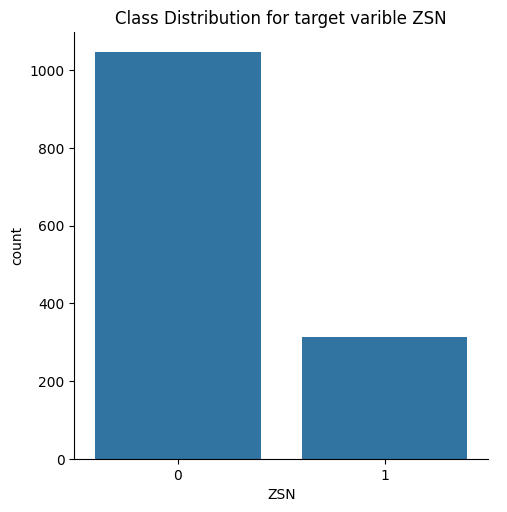

In [347]:
ZSN_distribution = sns.catplot(x = 'ZSN', kind = 'count', data = pd.DataFrame(y_train))
ZSN_distribution.set(title='Class Distribution for target varible ZSN')

3. Since the distribution is unbalanced we can implement undersampling.
4. Undersampling will reduce the number of training instances but since Naive Bayes is not training intensive, this will help the model perform well over both classes.

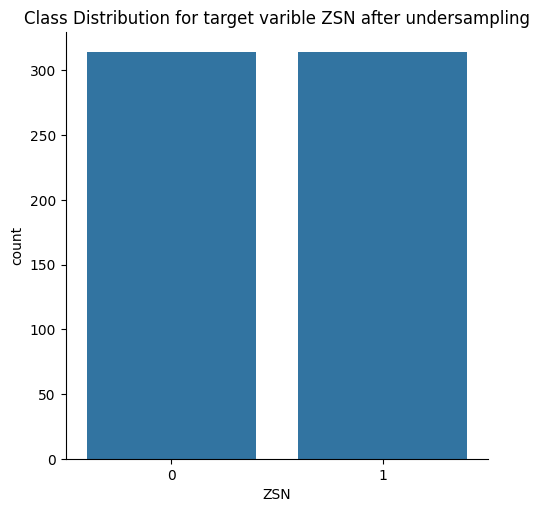

In [348]:
undersampler = RandomUnderSampler(random_state=42)
X_undersampled, y_undersampled = undersampler.fit_resample(X_train, pd.DataFrame(y_train))

ZSN_distribution = sns.catplot(x = 'ZSN', kind = 'count', data = pd.DataFrame(y_undersampled))
ZSN_distribution.set(title='Class Distribution for target varible ZSN after undersampling')

In [349]:
# Combine X_undersampled and y_undersampled for further analysis
undersampled_dataset = X_undersampled.copy()
undersampled_dataset['ZSN'] = y_undersampled
undersampled_dataset

,AGE,SEX,INF_ANAM,STENOK_AN,FK_STENOK,IBS_POST,IBS_NASL,GB,SIM_GIPERT,DLIT_AG,...,NOT_NA_2_n,NOT_NA_3_n,LID_S_n,B_BLOK_S_n,ANT_CA_S_n,GEPAR_S_n,ASP_S_n,TIKL_S_n,TRENT_S_n,ZSN
1620,0.272727,1,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0
781,0.606061,0,1.0,1.0,2.0,1.0,0.0,2.0,0.0,6.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
176,0.590909,0,1.0,4.0,2.0,2.0,0.0,2.0,0.0,3.0,...,0.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0
1629,0.636364,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0
1528,0.530303,1,3.0,6.0,3.0,2.0,0.0,3.0,0.0,7.0,...,0.000000,0.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87,0.560606,0,0.0,0.0,0.0,2.0,0.0,2.0,0.0,1.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1
466,0.621212,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
1095,0.727273,1,2.0,6.0,2.0,1.0,0.0,2.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1
860,0.484848,1,2.0,4.0,2.0,2.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1


### Boxplots on Continuous Feature Columns

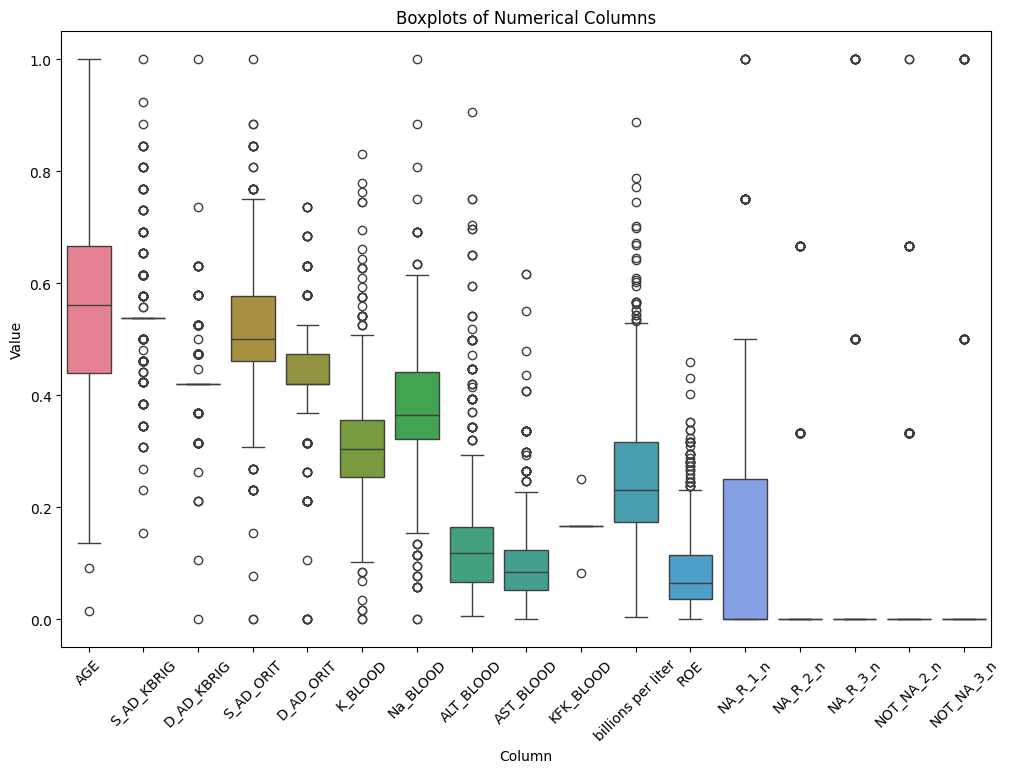

In [350]:
required_columns = continuous_columns + ['ZSN']

# Box plot for numerical columns
plt.figure(figsize=(12, 8))
sns.boxplot(data=undersampled_dataset[continuous_columns])
plt.title('Boxplots of Numerical Columns')
plt.xlabel('Column')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.show()

### Histograms on all columns

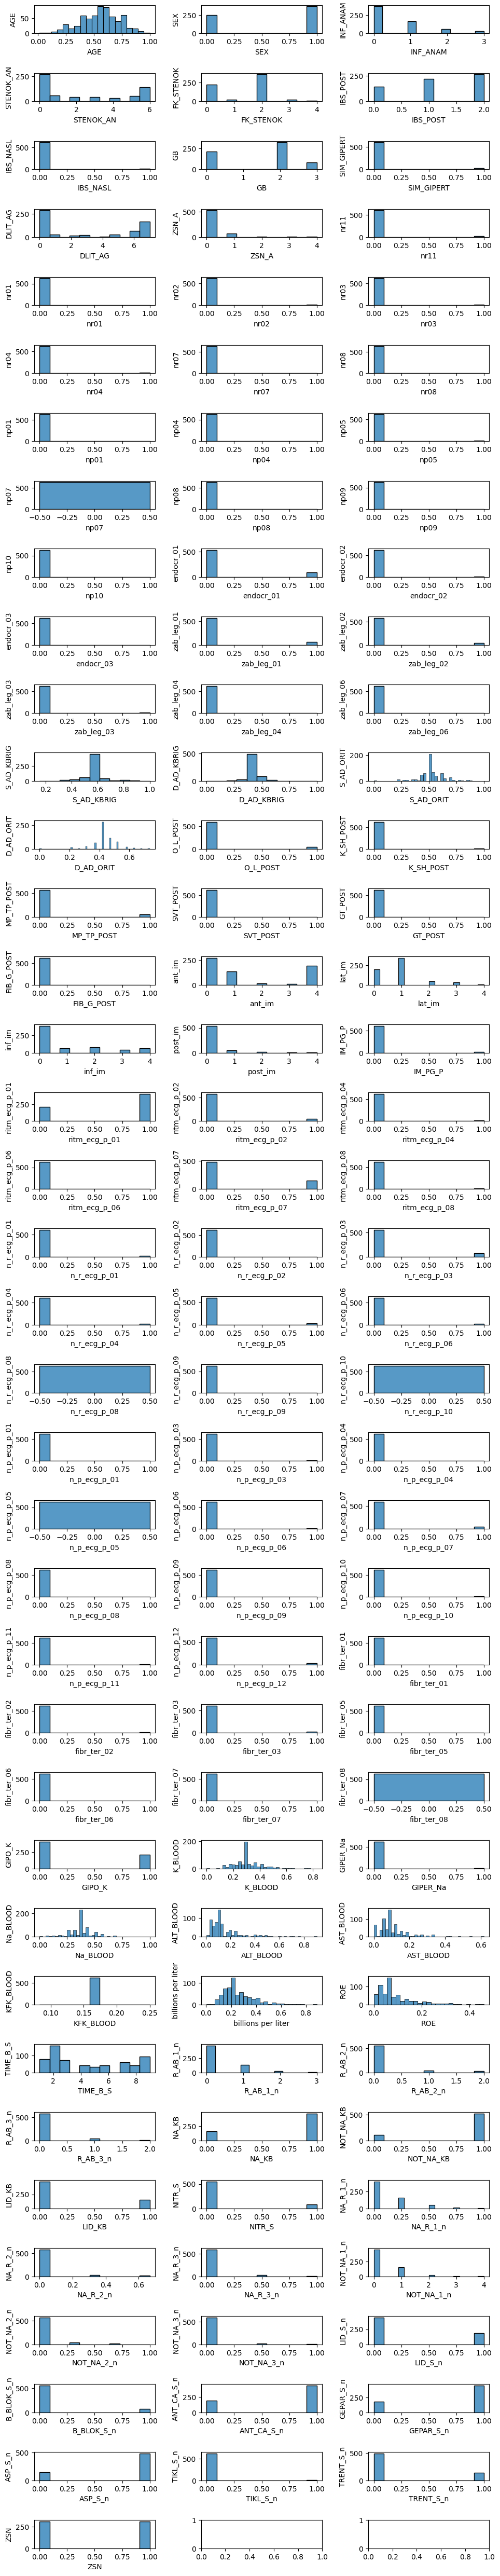

In [351]:
fig, positions = plt.subplots(38, 3, figsize=(10,50))
y = 0
for col in undersampled_dataset.columns:
    i, j = divmod(y, 3)
    sns.histplot(x = col, data = undersampled_dataset, ax = positions[i, j])
    positions[i, j].set_ylabel(col)
    y = y + 1
fig.tight_layout(pad = 2.0)


## Implementing Binary Classification

### Gaussian Naive Bayes

1. We implement the Gaussian Naive Bayes using the sklearn library.
2. As it can be seen that the reported f1-score is quite low, arround 0.1896 which means the model fails to classify both classes correctly due to imbalance in data

In [352]:
# Initializing model for Gaussian Naive Bayes
gnb = GaussianNB()

# Training the model on the undersampled training data
gnb.fit(X_undersampled, y_undersampled['ZSN'])

# using the trained model for prediction
y_pred = gnb.predict(X_test)

# Calculating the overall f1-score and otehr performance metrics over both classes
print('Aggregated f1-score on test data:', f1_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred))

Aggregated f1-score on test data: 0.1896551724137931

Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.90      0.83       260
           1       0.31      0.14      0.19        80

    accuracy                           0.72       340
   macro avg       0.54      0.52      0.51       340
weighted avg       0.66      0.72      0.68       340



### Hypertuning the Gaussian Naive Bayes model
1. To improve the performance of the GaussianNB we implement Hypertuning using parameter var_smoothing
2. As it can be seen the aggredated pf1-score on test data increases from 0.1896 to 0.3809
3. The overall performance on class 1 also increases accross different metrics to some extent

In [355]:
#Hyper tuning GNB

# Defining the range of values for var_smoothing
param_grid = {'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]}  

# Performing grid search on 
grid_search = GridSearchCV(gnb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_undersampled, y_undersampled['ZSN'])

# Print the best hyperparameters found
print("Best hyperparameters found:", grid_search.best_params_)
print("Best F1-score on training data found:", grid_search.best_score_)

# setting the parameter for a new model
best_gnb = GaussianNB(var_smoothing=grid_search.best_params_['var_smoothing'])

# Training the new model
best_gnb.fit(X_undersampled, y_undersampled['ZSN'])

# Making predictions on the test set
y_pred_2 = best_gnb.predict(X_test)

print('Aggregated f1-score on test data:', f1_score(y_test,y_pred_2))
print('\nClassification Report:\n', classification_report(y_test,y_pred_2))

Best hyperparameters found: {'var_smoothing': 1e-05}
Best F1-score on training data found: 0.42656828199919844
Aggregated f1-score on test data: 0.38095238095238093

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       260
           1       0.42      0.35      0.38        80

    accuracy                           0.73       340
   macro avg       0.61      0.60      0.61       340
weighted avg       0.72      0.73      0.72       340



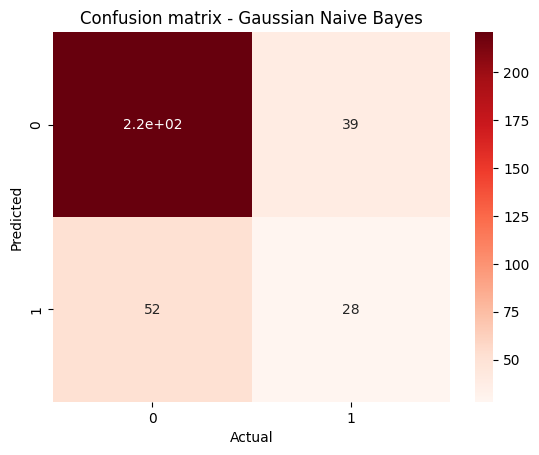

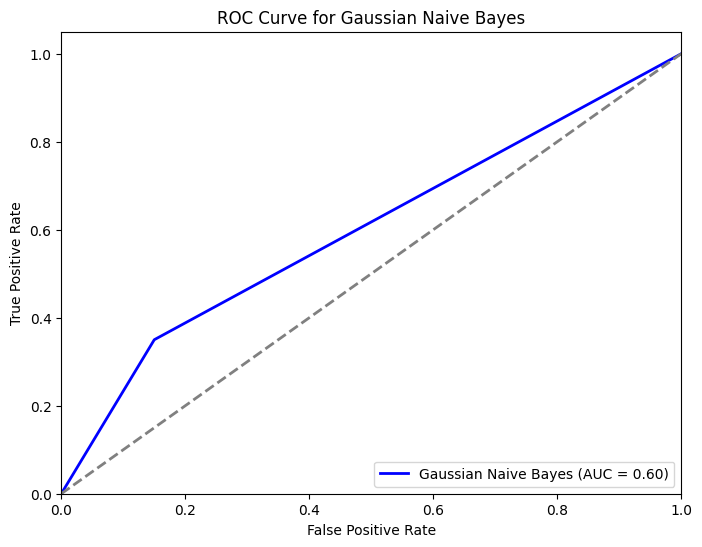

In [356]:
# Displaying the Confusion matrix for True and predicted classes
cm = confusion_matrix(y_test, y_pred_2)
plt.title('Confusion matrix - Gaussian Naive Bayes')
ax = sns.heatmap(cm, cmap = 'Reds', annot = True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# Compute ROC curve and ROC area for Bernoulli Naive Bayes
fpr_gnb, tpr_gnb, thresholds_bnb = roc_curve(y_test, y_pred_2)
roc_auc_gnb = auc(fpr_gnb, tpr_gnb)

# Plot ROC curve for Bernoulli Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label='Gaussian Naive Bayes (AUC = %0.2f)' % roc_auc_gnb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Gaussian Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Based on the heatmap - 
- True Positive: 28
- True Negatives: 220
- False Positives: 52
- False Negative: 39

### Bernoulli Naive Bayes
1. The performace of Gaussian Naive Bayes improved by hypertuning, but still the f1-score can be improved by implementing another Naive Bayes approach
2. The Bernoulli Naive Bayes is good at handling binary and categorical data which is abundant in the dataset.
3. Similar to GaussianNB, we implement BernoulliNB using the SKlearn library

In [357]:
bnb = BernoulliNB()

# Train the model on the training data
bnb.fit(X_undersampled, y_undersampled['ZSN'])
y_pred = bnb.predict(X_test)
print('Aggregated f1-score on test data:', f1_score(y_test,y_pred))
print('\nClassification Report:\n', classification_report(y_test,y_pred_2))

Aggregated f1-score on test data: 0.5026737967914439

Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.85      0.83       260
           1       0.42      0.35      0.38        80

    accuracy                           0.73       340
   macro avg       0.61      0.60      0.61       340
weighted avg       0.72      0.73      0.72       340



### Hypertuning the Bernoulli Naive Bayes
1. Hypertuning the Bernoulli Naive Bayes is based on the findind the hyperparameter alpha. This approach is called Laplace smoothing
2. After training the hypertuned model on training dataset and getting the predictions, it can be seen that although the Aggregated f1-score is same the, the performace of model over class 1 has increased.
3. The precision, recal as well as the f1-score on class 1 has increased significantly.

In [358]:
# Define the parameter grid to search
param_grid = {'alpha': [0.1, 0.5, 1.0, 2.0]}

# Initialize GridSearchCV with the classifier and parameter grid
grid_search = GridSearchCV(bnb, param_grid, cv=5, scoring='f1', n_jobs=-1)
grid_search.fit(X_undersampled, y_undersampled['ZSN'])

print("Best hyperparameters found:")
print(grid_search.best_params_)

# Print the best F1-score found
print("Best F1-score found:", grid_search.best_score_)

best_bnb = BernoulliNB(alpha=grid_search.best_params_['alpha'])

# Training the new model on the entire resampled dataset
best_bnb.fit(X_undersampled, y_undersampled['ZSN'])

# Making predictions on the test set
y_pred_2 = best_bnb.predict(X_test)
print('Aggregated f1-score on test data:', f1_score(y_test,y_pred_2))
print('\nClassification Report:\n', classification_report(y_test,y_pred_2))

Best hyperparameters found:
{'alpha': 0.5}
Best F1-score found: 0.6306650725870132
Aggregated f1-score on test data: 0.5026178010471204

Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.76      0.81       260
           1       0.43      0.60      0.50        80

    accuracy                           0.72       340
   macro avg       0.65      0.68      0.65       340
weighted avg       0.76      0.72      0.73       340



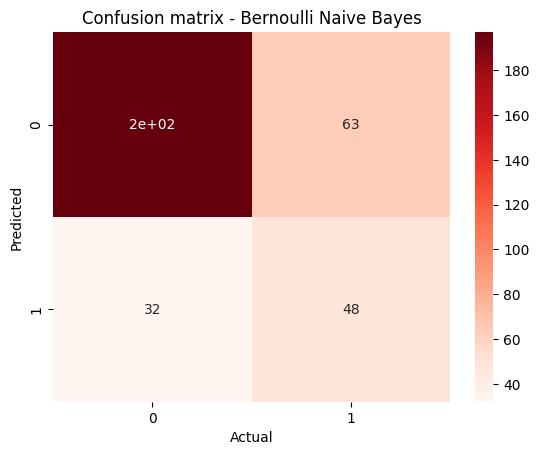

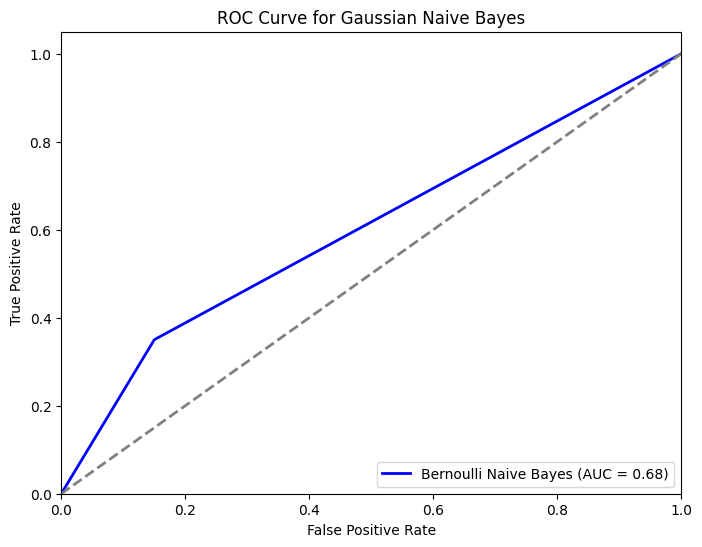

In [359]:
cm = confusion_matrix(y_test, y_pred_2)

# Display using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
# disp.plot()
plt.title('Confusion matrix - Bernoulli Naive Bayes')
ax = sns.heatmap(cm, cmap = 'Reds', annot = True)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.show()


# Compute ROC curve and ROC area for Bernoulli Naive Bayes
fpr_bnb, tpr_bnb, thresholds_bnb = roc_curve(y_test, y_pred_2)
roc_auc_bnb = auc(fpr_bnb, tpr_bnb)

# Plot ROC curve for Bernoulli Naive Bayes
plt.figure(figsize=(8, 6))
plt.plot(fpr_gnb, tpr_gnb, color='blue', lw=2, label='Bernoulli Naive Bayes (AUC = %0.2f)' % roc_auc_bnb)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Bernoulli Naive Bayes')
plt.legend(loc="lower right")
plt.show()

Based on the heatmap - 
- True Positive: 48
- True Negatives: 220
- False Positives: 32
- False Negative: 63